# Исследования влияния длина title на позицию в Яндексе

анализируется выдача 100 сайтов по запросам
1. гофрокартон в листах купить
2. охрана с собаками
3. передержка собак
4. дрессировка собак	
5. передержка собак

        

Импортируем данные о позициях

In [4]:
# Рисовать графики сразу же
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок

df=pd.read_csv('out.csv') #

df.head()

,Unnamed: 0,query,pos,url,doccount,size,domain,charset,mime-type
0,0,гофрокартон в листах купить,1,https://velar.ru/catalog/packaging-materials/c...,2522.0,2805.0,velar.ru,utf-8,text/html
1,1,гофрокартон в листах купить,2,https://cpereezd.ru/shop/gofrokarton/,438.0,2257.0,cpereezd.ru,utf-8,text/html
2,2,гофрокартон в листах купить,3,https://shop.cargo-avto.ru/catalog/gofrokarton/,1008.0,4932.0,shop.cargo-avto.ru,utf-8,text/html
3,3,гофрокартон в листах купить,4,https://tiu.ru/Gofrokarton-v-listah.html,53424.0,3529.0,tiu.ru,utf-8,text/html
4,4,гофрокартон в листах купить,5,https://upakovka.fabrikapereezda.ru/kartonnye-...,32.0,1803.0,upakovka.fabrikapereezda.ru,utf-8,text/html


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Unnamed: 0    500 non-null int64
query         500 non-null object
pos           500 non-null int64
url           499 non-null object
doccount      499 non-null float64
size          499 non-null float64
domain        499 non-null object
charset       499 non-null object
mime-type     499 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 35.2+ KB


У нас таблица в которой 5 запросов, и для каждого запроса есть первые 100 позиций. Спарсим title всех релевантных страниц, у нас их получилось 499 (url 499 non-null object).

In [6]:
%%time
import requests
from lxml import html

from tqdm import tnrange, tqdm_notebook
from time import sleep

def get_title_autocode(url):
    """Return the content of the website on the given url in
    a parsed lxml format that is easy to query."""
    response = requests.get(url, timeout=(30, 100))
    parsed_page = html.fromstring(response.content)
    return parsed_page.xpath('//title')[0].text

for i in tqdm_notebook(range(df.shape[0])):
    try:
        url=df.loc[i,'url']
        df.loc[i,'title']=get_title_autocode(url)
    except:
        df.loc[i,'title']='ConnectionError'
    
    
    
    


A Jupyter Widget


Wall time: 15min 56s


Сделаем сортировку по колонке title, чтобы посмотреть что получилось.

In [7]:
df.sort_values(by='title')

,Unnamed: 0,query,pos,url,doccount,size,domain,charset,mime-type,title
214,14,дрессировка собак,15,http://artdog.ru/dressirovka-sobak,34.0,898.0,artdog.ru,utf-8,text/html,\n\tДрессировка собак в СПб. Школа дрессировки\t
82,82,гофрокартон в листах купить,83,http://www.korobox.ru/index.php?page=33,4.0,1625.0,www.korobox.ru,windows-1251,text/html,\n ГОФРОКАРТОН
162,62,гостиница для собак,63,http://www.spbcat.ru/firms/278581-gostinitsa-d...,5.0,624.0,www.spbcat.ru,utf-8,text/html,\n Гостиница для собак - Санкт-Петербург и ...
375,75,охрана с собаками,76,https://ru.jobrapido.com/%D0%9E%D1%85%D1%80%D0...,13.0,579.0,ru.jobrapido.com,utf-8,text/html,"\n Ð Ð°Ð±Ð¾ÑÐ°: ÐÑ ÑÐ°Ð½Ð° Ð¡Ð¾Ð±Ð°ÐºÐ¾Ð¹,..."
474,74,передержка собак,75,http://www.lenoblinform.ru/news/bezdomnie-soba...,7.0,4686.0,www.lenoblinform.ru,utf-8,text/html,\nБездомные собаки Ленобласти: борьба набирает...
277,77,дрессировка собак,78,https://www.instagram.com/dressura.sobak/,18.0,145.0,www.instagram.com,utf-8,text/html,\nДрессировка Собак. Москва (@dressura.sobak) ...
158,58,гостиница для собак,59,https://zoohotel.spb.ru/,2.0,419.0,zoohotel.spb.ru,utf-8,text/html,\nЗоогостиница для кошек Рыжий Кот в Санкт-Пет...
160,60,гостиница для собак,61,https://www.instagram.com/zoogostinica/,19.0,148.0,www.instagram.com,utf-8,text/html,\n🐾Зоогостиница Лапа 🐾 (@zoogostinica) • Insta...
494,94,передержка собак,95,http://ko-komanda.org/messages.aspx?TopicID=29...,9.0,1217.0,ko-komanda.org,utf-8,text/html,\r\n\tÐ­Ð¡Ð¢ÐÐÐÐ - 4 Ð³Ð¾Ð´Ð°. ÐÐ¸ÑÐµÐ½Ð...
366,66,охрана с собаками,67,https://spb.rabotavgorode.ru/r742646,2.0,848.0,spb.rabotavgorode.ru,utf-8,text/html,\r\n\tРезюме охранник.охранник с собакой. стар...


Есть небольшое количество сайтов с ошибками или парскер не смог определить кодировку, но это небольшая от выборки, так что в первом приближении не будем обращать на это внимание.

Далее определим для каждого title его длину

In [8]:
%%time

for i in tqdm_notebook(range(df.shape[0])):
    try:
        title=df.loc[i,'title']
        df.loc[i,'len_title']=len(title)
    except:
        df.loc[i,'title']='Error'

A Jupyter Widget


Wall time: 1.51 s


In [9]:
df.head()

,Unnamed: 0,query,pos,url,doccount,size,domain,charset,mime-type,title,len_title
0,0,гофрокартон в листах купить,1,https://velar.ru/catalog/packaging-materials/c...,2522.0,2805.0,velar.ru,utf-8,text/html,Листовой картон — заказать картон оптом и в р...,69.0
1,1,гофрокартон в листах купить,2,https://cpereezd.ru/shop/gofrokarton/,438.0,2257.0,cpereezd.ru,utf-8,text/html,★Гофрокартон листовой и рулонный купить недоро...,57.0
2,2,гофрокартон в листах купить,3,https://shop.cargo-avto.ru/catalog/gofrokarton/,1008.0,4932.0,shop.cargo-avto.ru,utf-8,text/html,"Купить листовой гофрокартон - 21,9 руб/м² - Оп...",55.0
3,3,гофрокартон в листах купить,4,https://tiu.ru/Gofrokarton-v-listah.html,53424.0,3529.0,tiu.ru,utf-8,text/html,ÐÐ¾ÑÑÐ¾ÐºÐ°ÑÑÐ¾Ð½ Ð² Ð»Ð¸ÑÑÐ°Ñ Ð² Ð Ð...,177.0
4,4,гофрокартон в листах купить,5,https://upakovka.fabrikapereezda.ru/kartonnye-...,32.0,1803.0,upakovka.fabrikapereezda.ru,utf-8,text/html,Купить листовой картон в Москве. Упаковочный к...,79.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
Unnamed: 0    500 non-null int64
query         500 non-null object
pos           500 non-null int64
url           499 non-null object
doccount      499 non-null float64
size          499 non-null float64
domain        499 non-null object
charset       499 non-null object
mime-type     499 non-null object
title         500 non-null object
len_title     500 non-null int64
type_title    500 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 47.0+ KB


Посторим диаграмму рассеяния и определим корреляцию

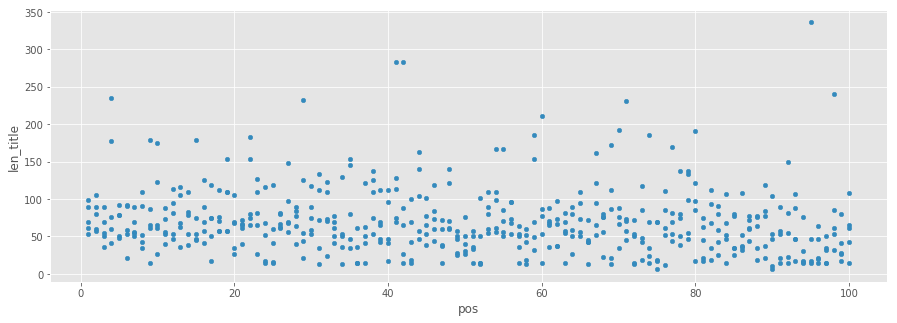

In [10]:
df.plot(x='pos', y='len_title', kind='scatter')

In [11]:
df['pos'].corr(df['len_title'])

-0.1309395164057445

**Связь между длиной title и позицией очень слабая**

Проанализируем распределение длины title у сайтов которые в топ 10, и у сайтов которые за топом.

Статистические характеристики сайтов на позициях с 11 по 100:


In [14]:
df[df['pos']>10].describe()

,Unnamed: 0,pos,doccount,size,len_title
count,450.000000,450.000000,449.000000,449.000000,449.000000
mean,54.500000,55.500000,234.643653,1866.193764,68.391982
std,26.008072,26.008072,1700.095463,3526.364370,44.552763
min,10.000000,11.000000,1.000000,0.000000,6.000000
25%,32.000000,33.000000,4.000000,770.000000,40.000000
50%,54.500000,55.500000,12.000000,1259.000000,61.000000
75%,77.000000,78.000000,47.000000,2085.000000,84.000000
max,99.000000,100.000000,27731.000000,55765.000000,336.000000


Плотность распределения длины title: сайтов на позициях с 11 по 100:

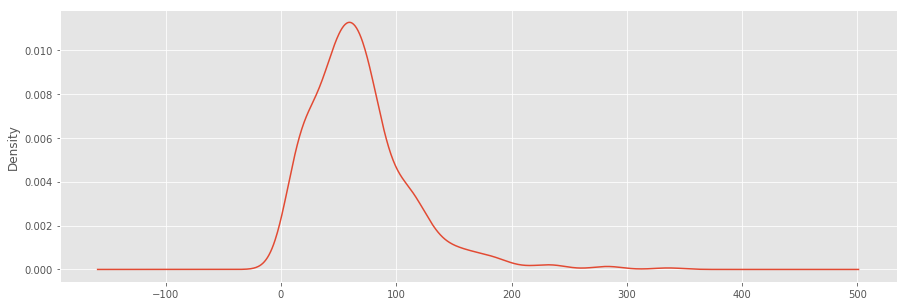

In [13]:
df[(df['pos']>10)]['len_title'].plot(kind='kde')

Статистические характеристики сайтов на позициях с 1 по 10:

In [15]:
df[df['pos']<11].describe()

,Unnamed: 0,pos,doccount,size,len_title
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.500000,5.500000,11838.580000,2500.240000,76.560000
std,2.901442,2.901442,36936.630264,2059.066884,41.689895
min,0.000000,1.000000,1.000000,0.000000,15.000000
25%,2.000000,3.000000,35.250000,1546.250000,53.250000
50%,4.500000,5.500000,570.000000,2159.000000,65.000000
75%,7.000000,8.000000,2430.000000,3062.250000,90.000000
max,9.000000,10.000000,202514.000000,14235.000000,235.000000


Плотность распределения длины title: сайтов на позициях с 1 по 10:

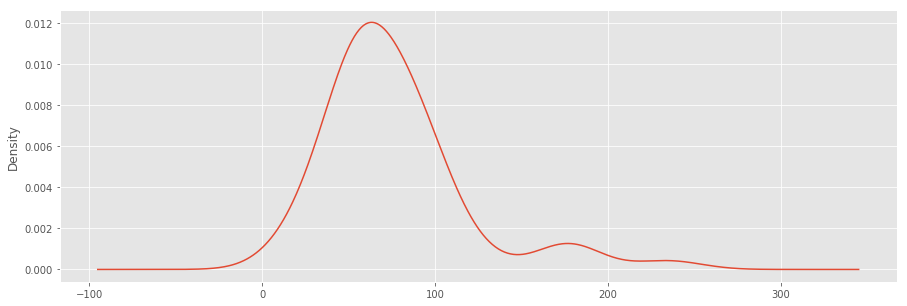

In [16]:
df[(df['pos']<11)]['len_title'].plot(kind='kde')

И посмотрим на распределение длин title на позиях с 1 по 10. 

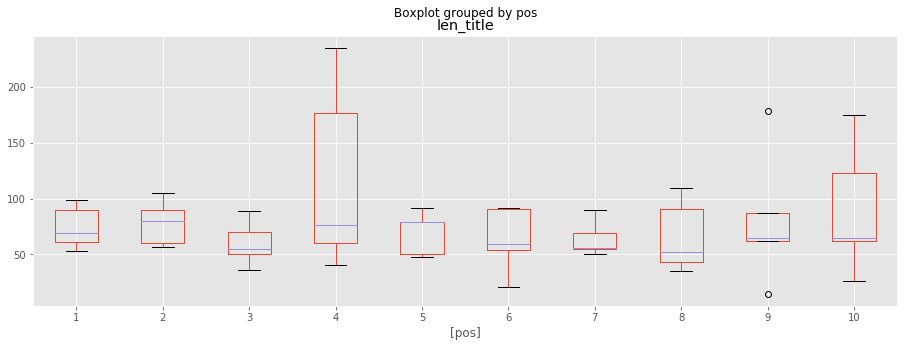

In [17]:
df[(df['pos']<11)][['pos','len_title']].boxplot(by='pos')

Экспортируем данные в csv 

In [23]:
df.to_csv('df_len_title.csv')
#df.to_html('to_html')
df.to_json('json')
df.to_pickle('pickle')
df.to_hdf('df_len_title.h5','table', append=True)

# Вывод:
Длина title сайтов из топ 10 не сильно отличается от длин title топ 100. Если ориентироваться на сайты, которые на 1 страниц, то рекомендаци для составление title делать его длиной **от 60 до 90 символов.**
